## Visualising Earning Based on College Majors


In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

recent_grads=pd.read_csv('recent_grads.csv')

In [2]:
#inspecting no of rows and columns
recent_grads.shape

(173, 21)

In [3]:
pd.set_option('display.max_columns', 30)
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
#dropping any rows with missing values
recent_grads=recent_grads.dropna()


### Visualising features using scatter plots

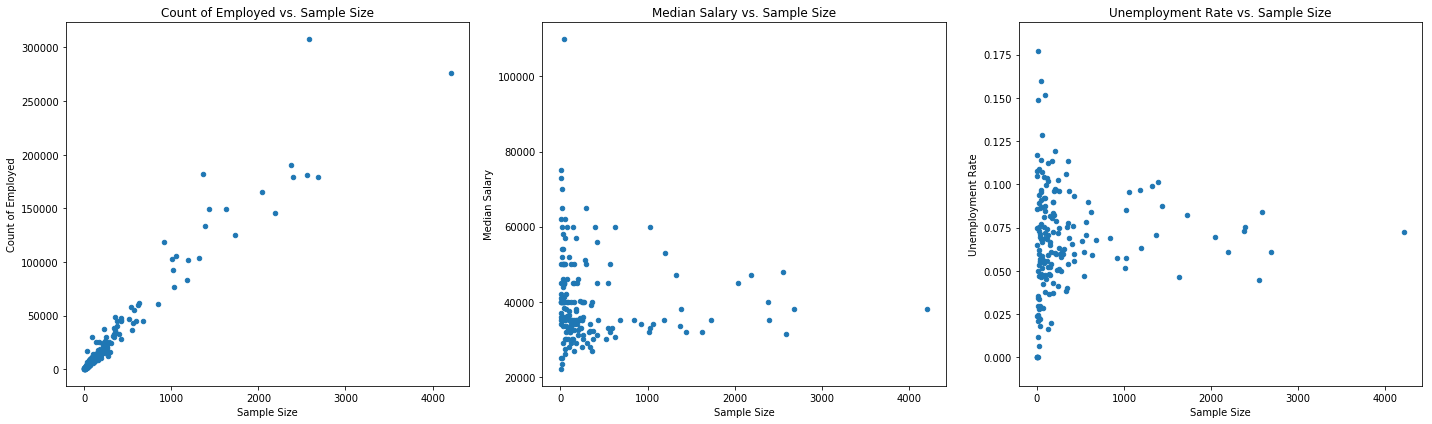

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))   
recent_grads.plot(x='Sample_size', 
                  y='Employed',
                  kind='scatter', 
                  title='Count of Employed vs. Sample Size',
                 ax=ax1)
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('Count of Employed')

recent_grads.plot('Sample_size', 'Median', 
                  kind= 'Scatter',
                  title='Median Salary vs. Sample Size',
                  ax=ax2)
ax2.set_xlabel('Sample Size')
ax2.set_ylabel('Median Salary')

recent_grads.plot('Sample_size', 'Unemployment_rate', 
                      kind='scatter', 
                      title='Unemployment Rate vs. Sample Size',
                  ax=ax3)
ax3.set_xlabel('Sample Size')
ax3.set_ylabel('Unemployment Rate')
plt.tight_layout()

Assessing different features against the sample size.
From the first figure, we can see that sample size is roughly linearly correlated with the count of employed people which would be as expected - with more people in a sample size, we'll be able to capture more employed people (as well as unemployed).

Also, we can see from the concentration of points at the lower sample sizes, that we capture smaller sample sizes more often than larger sample sizes. 

We can also see that at smaller sample sizes, we have more variation in the median salaries and unemployment rates seen, but that could just mean that we should aim to collect more data from larger sample sizes where we might also see the same variation.


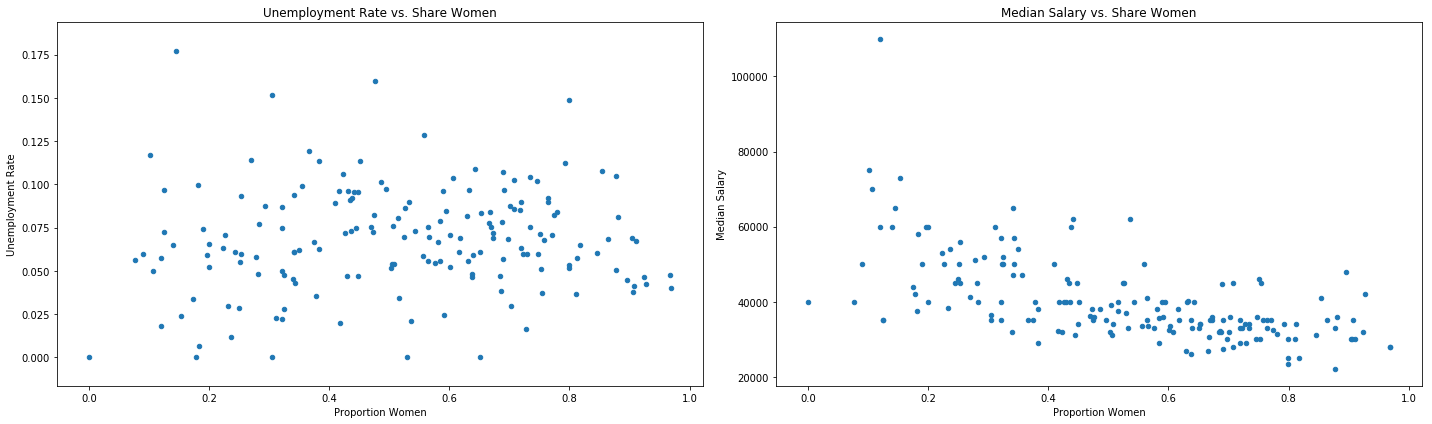

In [6]:
fig, (ax4, ax5) = plt.subplots(1,2, figsize=(20, 6))   

recent_grads.plot('ShareWomen', 'Unemployment_rate', 
                      kind='scatter', 
                      title='Unemployment Rate vs. Share Women',
                     ax=ax4)
ax4.set_xlabel('Proportion Women')
ax4.set_ylabel('Unemployment Rate')

recent_grads.plot('ShareWomen', 'Median', 
                      kind='scatter', 
                      title='Median Salary vs. Share Women',
                     ax=ax5)
ax5.set_xlabel('Proportion Women')
ax5.set_ylabel('Median Salary')

plt.tight_layout()


There is no clear relationship between the unemployment rate and the propotion of women with a certain college major.

However, there is a clear negative relationship between the median salary as the proportion of women which shows median salary decreases as propotion of women increases. There are of course expections, but the general trend shows this negative relationship.

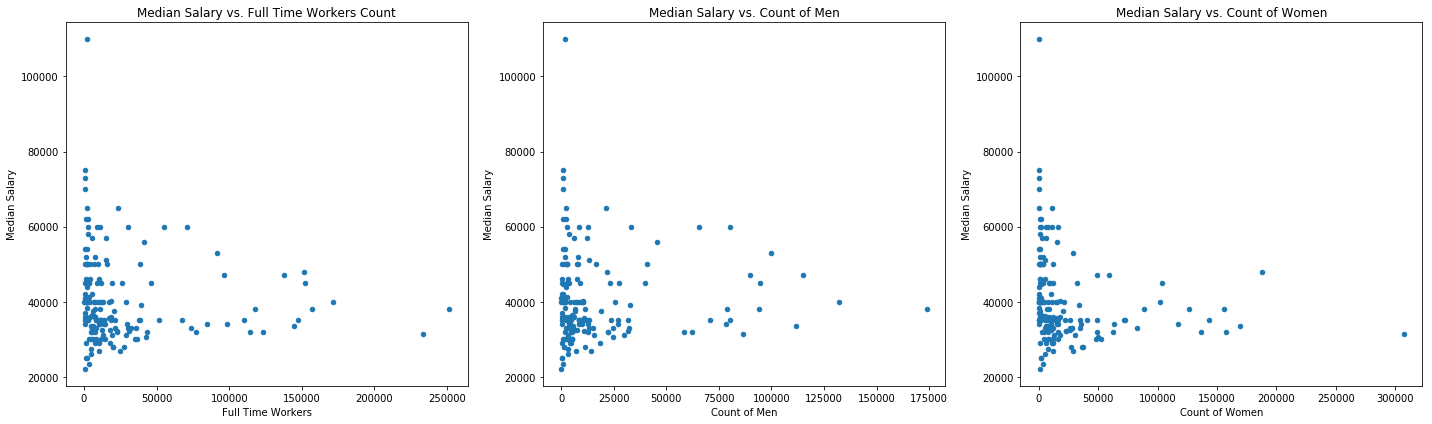

In [7]:
fig, (ax6, ax7, ax8) = plt.subplots(1,3, figsize=(20, 6))   

recent_grads.plot('Full_time', 'Median', 
                      kind='scatter', 
                      title='Median Salary vs. Full Time Workers Count',
                     ax=ax6)
ax6.set_xlabel('Full Time Workers')
ax6.set_ylabel('Median Salary')

recent_grads.plot('Men', 'Median', 
                      kind='scatter',
                      title='Median Salary vs. Count of Men',
                     ax=ax7)
ax7.set_xlabel('Count of Men')
ax7.set_ylabel('Median Salary')

recent_grads.plot('Women','Median', 
                     kind='scatter', 
                     title='Median Salary vs. Count of Women',
                     ax=ax8)
ax8.set_xlabel('Count of Women')
ax8.set_ylabel('Median Salary')

plt.tight_layout()

Similarly to the sample size plots above, we have more variation in the median salaries seen at lower counts of full time works; count of men ; and count of women. But that could just mean that we should aim to collect more data from larger counts of people where we might also see the same variation.

### Visualising using histograms

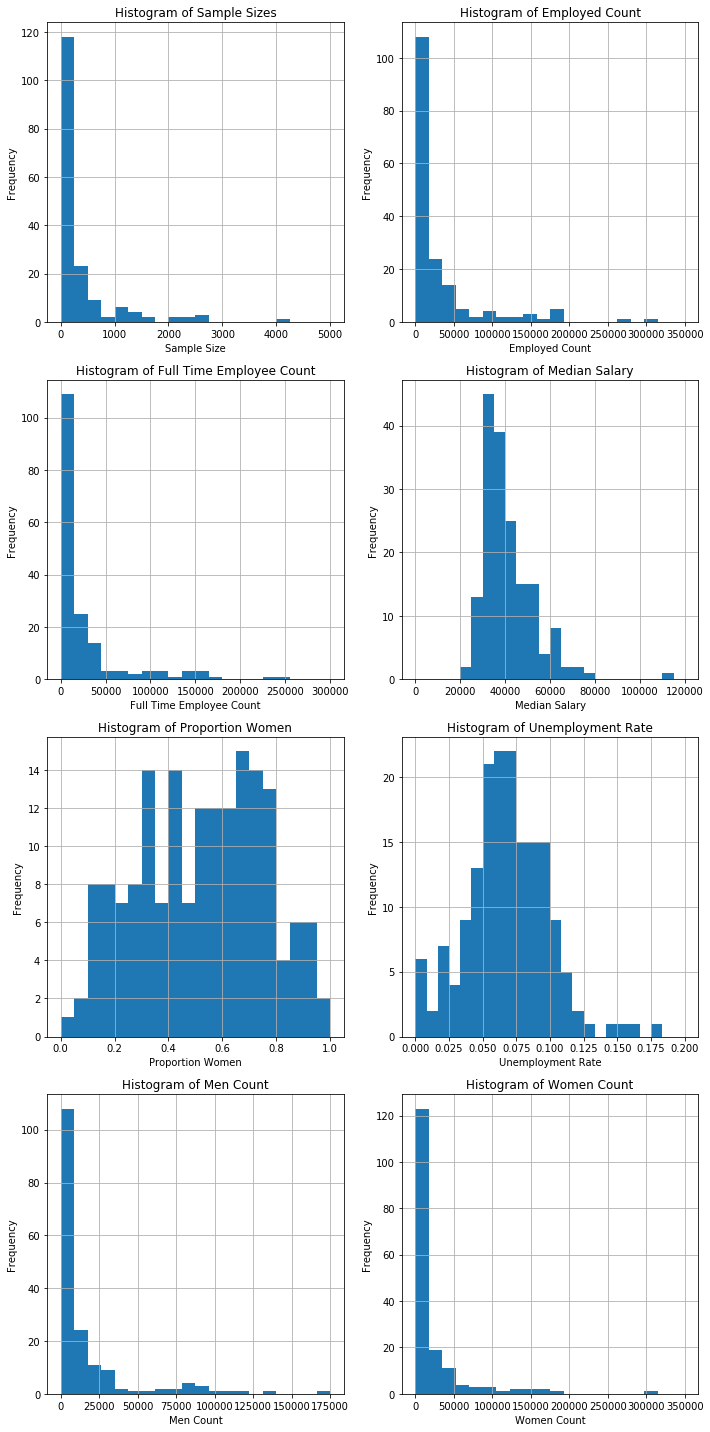

In [8]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(10, 20))   


recent_grads['Sample_size'].hist(bins=20, range=(0,5000),ax=ax1)
ax1.set_title('Histogram of Sample Sizes')
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('Frequency')


recent_grads['Employed'].hist(bins=20, range=(0,350000), ax=ax2)
ax2.set_title('Histogram of Employed Count')
ax2.set_xlabel('Employed Count')
ax2.set_ylabel('Frequency')

recent_grads['Full_time'].hist(bins= 20, range=(0,300000), ax=ax3)
ax3.set_title('Histogram of Full Time Employee Count')
ax3.set_xlabel('Full Time Employee Count')
ax3.set_ylabel('Frequency')

recent_grads['Median'].hist(bins=24, range=(0,120000), ax=ax4)
ax4.set_title('Histogram of Median Salary')
ax4.set_xlabel('Median Salary')
ax4.set_ylabel('Frequency')


recent_grads['ShareWomen'].hist(bins=20, range=(0,1), ax=ax5)
ax5.set_title('Histogram of Proportion Women')
ax5.set_xlabel('Proportion Women')
ax5.set_ylabel('Frequency')

recent_grads['Unemployment_rate'].hist(bins=24, range=(0,0.2) , ax=ax6)
ax6.set_title('Histogram of Unemployment Rate')
ax6.set_xlabel('Unemployment Rate')
ax6.set_ylabel('Frequency')

recent_grads['Men'].hist(bins=20, range= (0, 175000), ax=ax7)
ax7.set_title('Histogram of Men Count')
ax7.set_xlabel('Men Count')
ax7.set_ylabel('Frequency')

recent_grads['Women'].hist(bins=20, range=(0,350000), ax=ax8)
ax8.set_title('Histogram of Women Count')
ax8.set_xlabel('Women Count')
ax8.set_ylabel('Frequency')

plt.tight_layout()

The first 3 graphs on sample size, employed count and full time employee count tell us that there is a wide range of sizes and counts but the majority of the data sits on the lower end; smaller sample sizes and employee counts compared to the whole range.

The 4th graph, on median salary, shows us that the 30,000 to 40,000 (USD presumably) was the most common median salary range.

The 5th graph, on proportion of women, shows us that more than 50% of all majors are mostly female. There are roughly 76 majority male majors and 96 majority women majors.

The 6th graphs shows us that the most common rate of unemployment is between 0.05 and 0.075.

The last two graphs show the same details as the first 3 graphs; the men and women counts majoritively sit on the lower end of the range.

### Visualising using a scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119d9d588>,
      dtype=object)

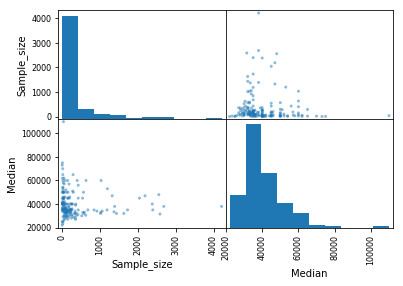

In [9]:
import pandas.plotting as pdplt
pdplt.scatter_matrix(recent_grads[['Sample_size','Median']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1197d64e0>,
      dtype=object)

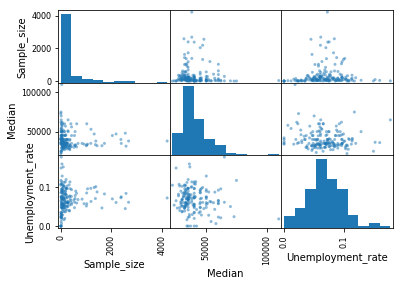

In [10]:
pdplt.scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']])

### Visualising using bar charts

### Simple initial plots

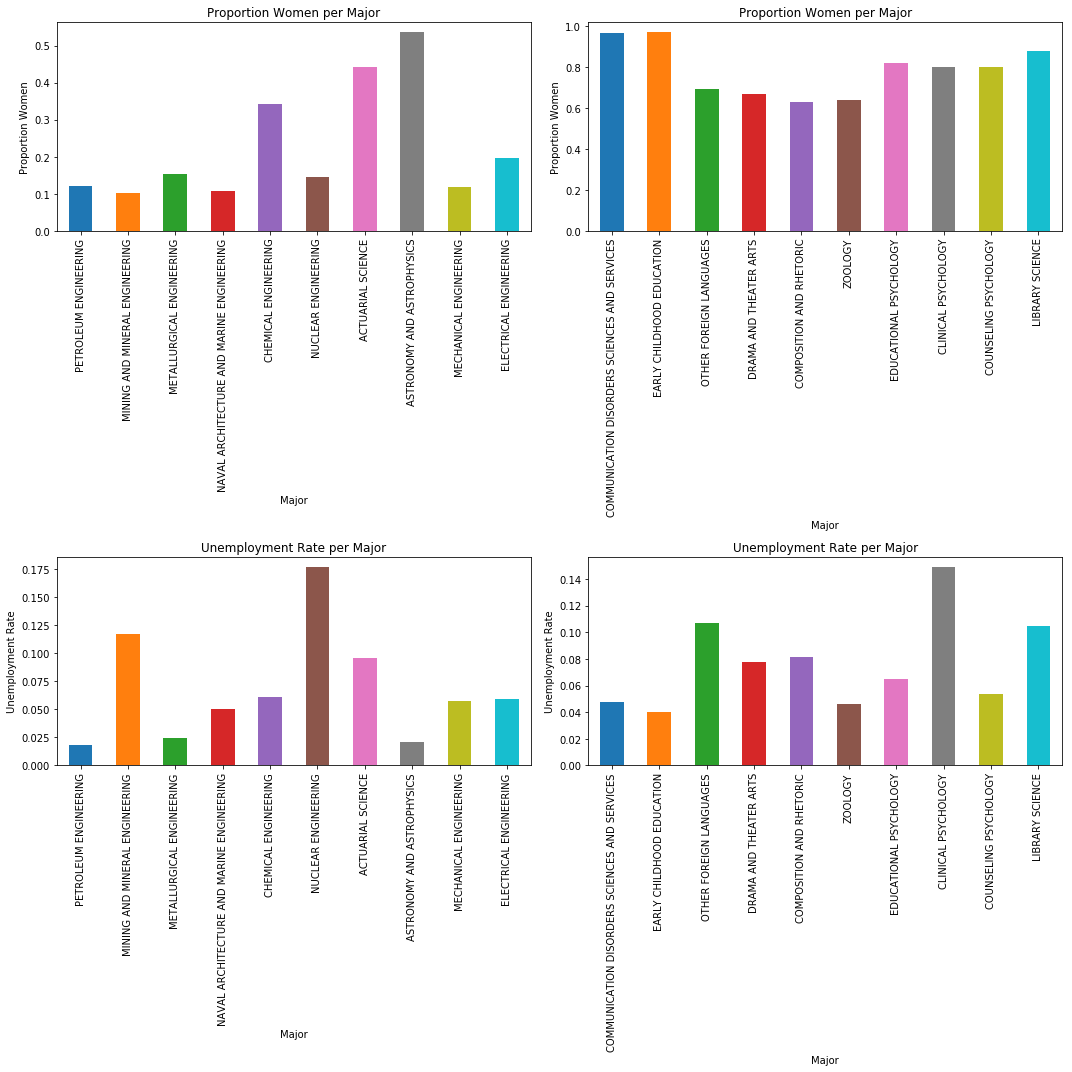

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))

recent_grads[:10].plot.bar(x='Major',y='ShareWomen', legend=False, ax=ax1)
ax1.set_ylabel('Proportion Women')
ax1.set_title('Proportion Women per Major')

recent_grads[-10:].plot.bar(x='Major',y='ShareWomen',legend=False, ax=ax2)
ax2.set_ylabel('Proportion Women')
ax2.set_title('Proportion Women per Major')

recent_grads[:10].plot.bar(x='Major',y='Unemployment_rate', legend=False, ax=ax3)
ax3.set_ylabel('Unemployment Rate')
ax3.set_title('Unemployment Rate per Major')

recent_grads[-10:].plot.bar(x='Major',y='Unemployment_rate', legend=False, ax=ax4)
ax4.set_ylabel('Unemployment Rate')
ax4.set_title('Unemployment Rate per Major')

plt.tight_layout()

### Comparing Majors with lowest and highest prportions of Women

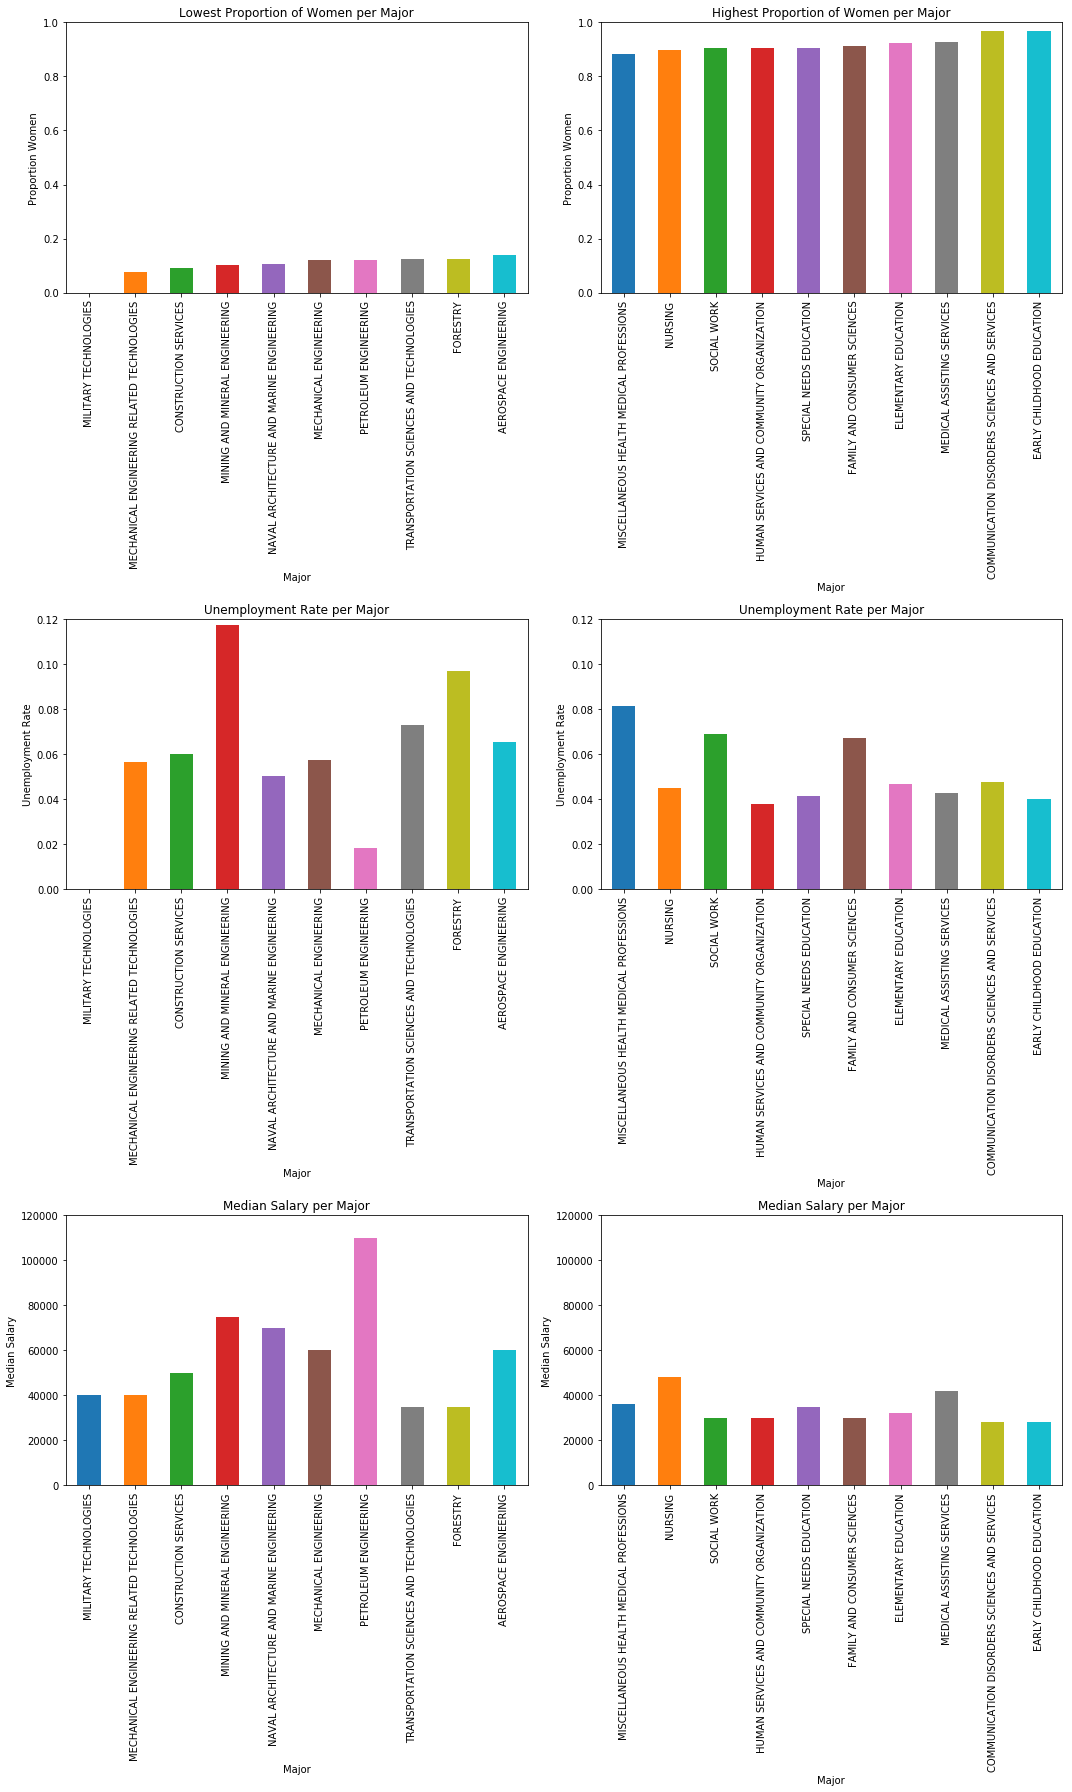

In [12]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15,25))

recent_grads.sort_values(['ShareWomen'])[:10].plot.bar(x='Major',y='ShareWomen', legend=False, ax=ax1)
ax1.set_ylabel('Proportion Women')
ax1.set_title('Lowest Proportion of Women per Major')
ax1.set_ylim([0,1])

recent_grads.sort_values(['ShareWomen'])[-10:].plot.bar(x='Major',y='ShareWomen',legend=False, ax=ax2)
ax2.set_ylabel('Proportion Women')
ax2.set_title('Highest Proportion of Women per Major')
ax2.set_ylim([0,1])

recent_grads.sort_values(['ShareWomen'])[:10].plot.bar(x='Major',y='Unemployment_rate', legend=False, ax=ax3)
ax3.set_ylabel('Unemployment Rate')
ax3.set_title('Unemployment Rate per Major')
ax3.set_ylim([0,0.12])

recent_grads.sort_values(['ShareWomen'])[-10:].plot.bar(x='Major',y='Unemployment_rate', legend=False, ax=ax4)
ax4.set_ylabel('Unemployment Rate')
ax4.set_title('Unemployment Rate per Major')
ax4.set_ylim([0,0.12])

recent_grads.sort_values(['ShareWomen'])[:10].plot.bar(x='Major',y='Median', legend=False, ax=ax5)
ax5.set_ylabel('Median Salary')
ax5.set_title('Median Salary per Major')
ax5.set_ylim([0,120000])

recent_grads.sort_values(['ShareWomen'])[-10:].plot.bar(x='Major',y='Median', legend=False, ax=ax6)
ax6.set_ylabel('Median Salary')
ax6.set_title('Median Salary per Major')
ax6.set_ylim([0,120000])

plt.tight_layout()

The three graphs on the left shows bar charts for the 10 majors which have the lowest proportion of women. 
We can see that 6 out of 10 of these majors are Engineering and that Military Technologies have zero women with the major.

The three graphs on the right show bar charts for the 10 majors which have the highest proportion of women.
These majors are all in the healthcare, healthcare support and social work areas.

Comparing the second row of graphs with one another, there does not seem to be a significant difference betweeen the employement rate of employment in the top 10 majority male and majority female majors.

However, comparing the last row of graphs, overall the top 10 majority female majors do have a median salary lower than the top 10 majority male majors.
There are some majority female majors which do have higher median salaries than the other majors e.g. Medical Assisting Services and Nursing have higher median salaries than majority male majors e.g. Military Technologies, Mechanical Engineering Related Technologies, Transportation Sciences and Technologies, and Forestry. But in the other Engineering Majors, which are male dominated, those median salaries are all higher than the majoritively female majors.


### Finding highest earning Major in each Major category

In [13]:
Major_cat=pd.unique(recent_grads['Major_category'])
Major_cat

array(['Engineering', 'Business', 'Physical Sciences',
       'Law & Public Policy', 'Computers & Mathematics',
       'Industrial Arts & Consumer Services', 'Arts', 'Health',
       'Social Science', 'Biology & Life Science', 'Education',
       'Agriculture & Natural Resources', 'Humanities & Liberal Arts',
       'Psychology & Social Work', 'Communications & Journalism',
       'Interdisciplinary'], dtype=object)

In [14]:
#looping through each major category to find the major with the highest median salary per each category
highest_median_per_major= []

for cat in Major_cat:
    major_in_cat= recent_grads[recent_grads['Major_category']==cat]
    highest_median_major = major_in_cat.sort_values(['Median'],ascending=False)['Major'].iloc[0]
    highest_median_per_major.append(highest_median_major)
    
highest_median_per_major

['PETROLEUM ENGINEERING',
 'ACTUARIAL SCIENCE',
 'ASTRONOMY AND ASTROPHYSICS',
 'COURT REPORTING',
 'COMPUTER SCIENCE',
 'CONSTRUCTION SERVICES',
 'MISCELLANEOUS FINE ARTS',
 'NURSING',
 'ECONOMICS',
 'PHARMACOLOGY',
 'SCHOOL STUDENT COUNSELING',
 'AGRICULTURE PRODUCTION AND MANAGEMENT',
 'UNITED STATES HISTORY',
 'INDUSTRIAL AND ORGANIZATIONAL PSYCHOLOGY',
 'COMMUNICATIONS',
 'MULTI/INTERDISCIPLINARY STUDIES']